# Satander Customer Satisfaction 

https://www.kaggle.com/competitions/santander-customer-satisfaction/overview


The premise of my challenge was to predict and identify (0) satisfied and (1) unsatisfied customers in their banking experience. By doing so this will allow Santander bank to take the required steps to improve customer satisfaction. 

I was provided with three csv files "train, test and sample submission". My train data consisted of 371 feautures, a target column and consisted of 76,020 rows. The size of the data set was also 119.04 MB.
I identified my datset as a binary classification problem and is a categorical and numerical data set

# Dataloading and Initial look

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#load data
df = pd.read_csv("train.csv")

I first began by loading the data set

In [11]:
#data set size
dataset_size = df.shape
print("Dataset Size:", dataset_size)

Dataset Size: (76020, 371)


the data has 371, columns and 7,6020 rows

In [12]:
#check for missing values
missing_data = df.isnull().sum()
# Check if there are any missing values
if missing_data.sum() > 0:
    print("Missing data found!")
    print(missing_data)
else:
    print("No missing data found.")

No missing data found.


In [13]:
print(df.head())

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

In [14]:
# table of feautures
display(df)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


* Based on the table, the feautres are numerical with the values ranging anywhere from 0-120,000. There are also a wide range of categorical variables

In [15]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


* Yes, i do see outliers, based on the means being so small compared to the max values. This indicated the max value could be an outlier. An outlier is an extreme value in the dataset

* There is definently a class imbalance in the data set with the data set leaning more towards the 0 Column. i calcualated the feauture percentages after data visulizations 

* The Target is encoded with 0s. and the Target column is the variable to predict

In [16]:
# any duplicates 
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


# Data Visualization


Number of category 0: 73012
Number of category 1: 3008


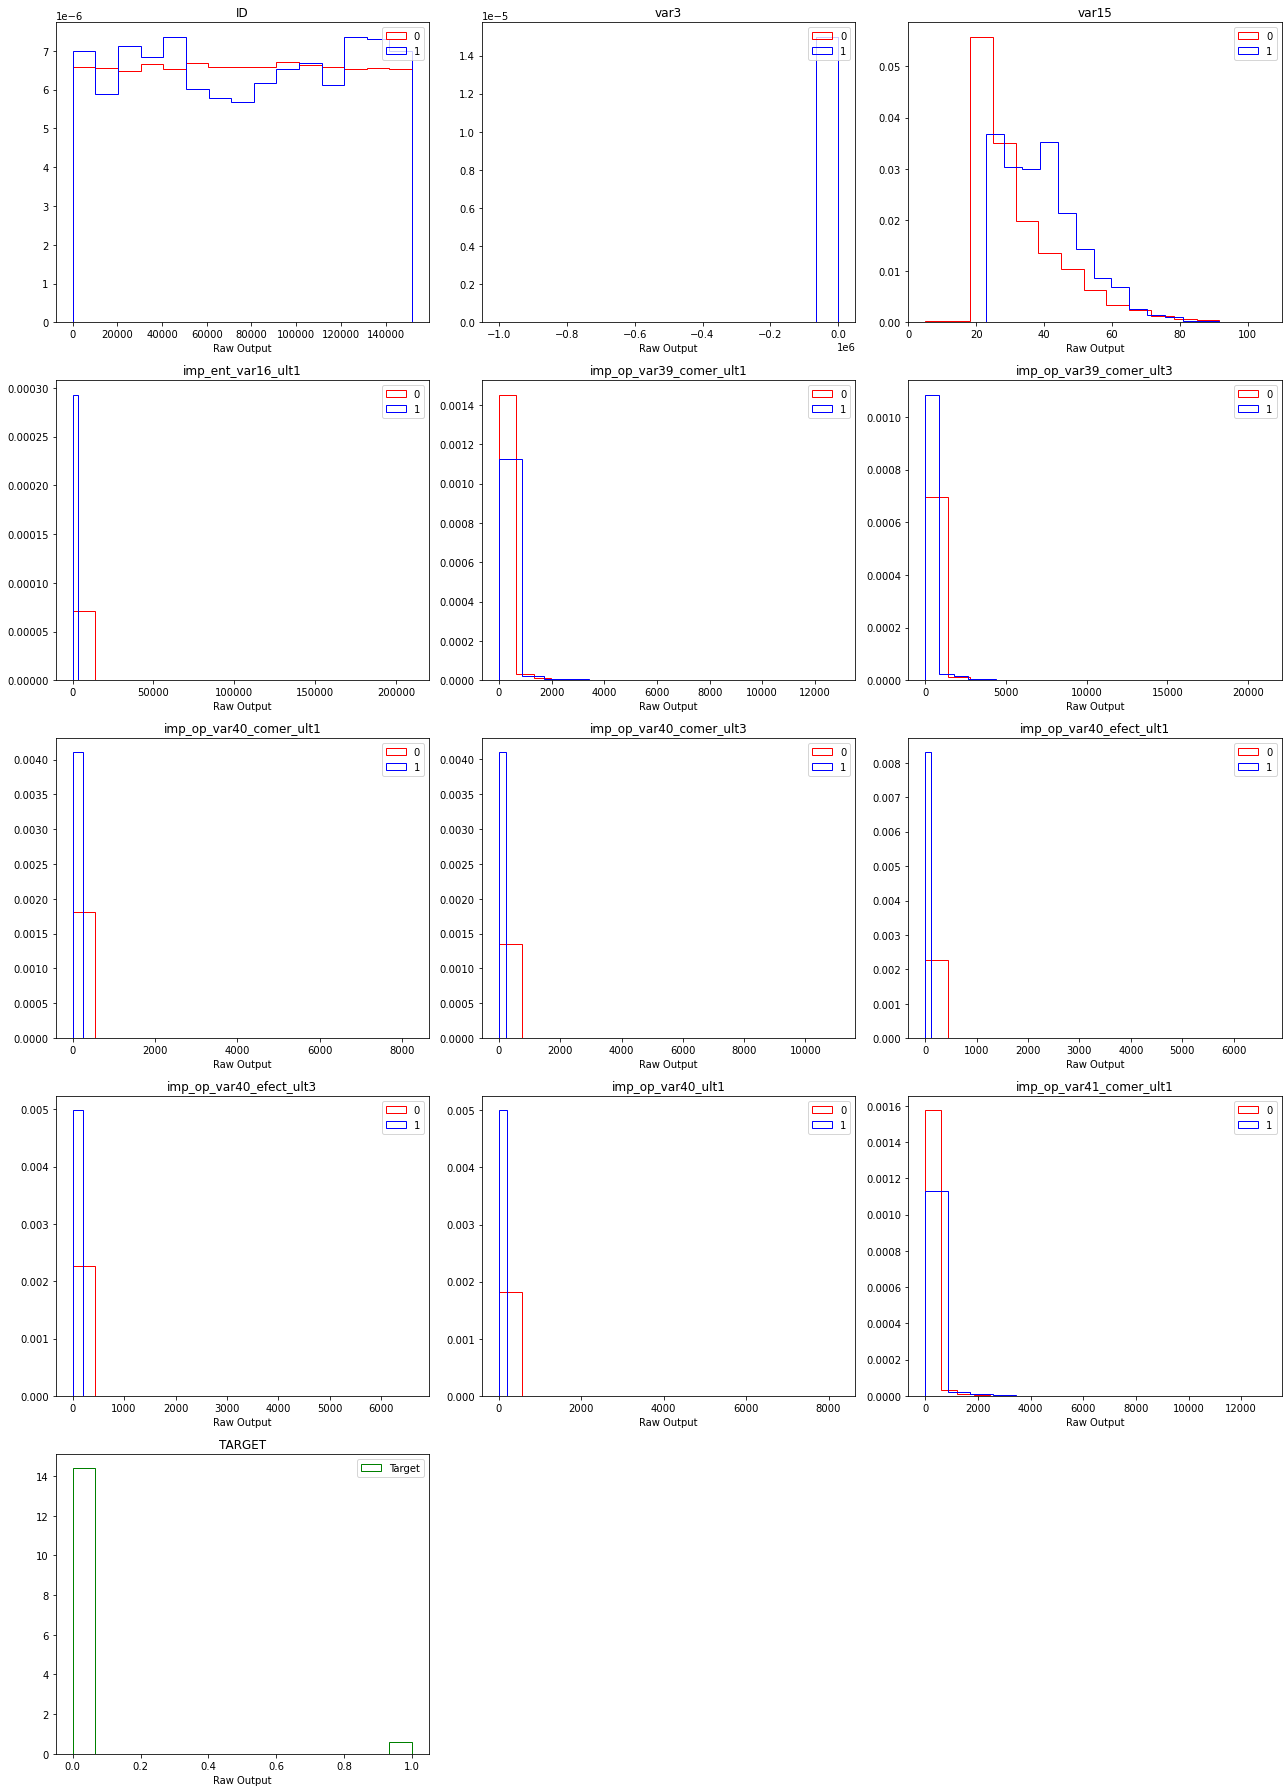

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

def compare_features_binary(d, logscale=False):
    # Get the target variable
    target = d["TARGET"]

    # Check if the target variable is a column name or an array of target values
    if isinstance(target, str):
        # Assuming target is the column name
        df_0 = d["Training"][d["Training"][target] == 0]
        df_1 = d["Training"][d["Training"][target] == 1]
    else:
        # Assuming target is an array of target values
        df_0 = d["Training"].loc[target == 0]
        df_1 = d["Training"].loc[target == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # Calculate the number of features
    num_features = min(12, d["Training"].shape[1])  # Considering only the first 12 features
    
    # Calculate the number of plots per row
    num_plots_per_row = min(3, num_features)  # Maximum of 3 plots per row
    
    # Calculate the number of rows needed
    num_rows = math.ceil((num_features + 1) / num_plots_per_row)  # Add one for the target column
    
    # Increase the size of individual plots
    plt.figure(figsize=(6 * num_plots_per_row, 5 * num_rows))

    # Plot histograms for raw outputs of each class
    for i, column in enumerate(df_0.columns[:num_features]):  # Looping through the first 12 columns
        plt.subplot(num_rows, num_plots_per_row, i + 1)
        plt.title(column)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=15, histtype="step", color="red", label="0", density=1, stacked=True)
        plt.hist(df_1[column], bins=15, histtype="step", color="blue", label="1", density=1, stacked=True)
        plt.legend()
        plt.xlabel("Raw Output")
    
    # Plot the target column
    plt.subplot(num_rows, num_plots_per_row, num_features + 1)
    plt.title(target)
    plt.hist(d["Training"][target], bins=15, histtype="step", color="green", label="Target", density=1, stacked=True)
    plt.legend()
    plt.xlabel("Raw Output")
    
    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame and "TARGET" is the name of the target column
d = {"Training": df, "TARGET": "TARGET"}
compare_features_binary(d)


the feautres that would look more promising for machine learning algorith would typically be the where the classes do no look identical to eachother would train well. Cant make further inferences on the histogrmams due to their being no desscription of the labels on Kaggle

In [18]:
#calculate feautre precentages 
train_data = pd.read_csv('train.csv')

# Calculate the percentages of unsatisfied and satisfied customers
unsatisfied_percentage = (train_data['TARGET'].value_counts(normalize=True) * 100)[0]
satisfied_percentage = (train_data['TARGET'].value_counts(normalize=True) * 100)[1]

# display the percentages
percentage_df = pd.DataFrame({
    'Category': ['Unsatisfied', 'Satisfied'],
    'Percentage': [unsatisfied_percentage, satisfied_percentage]
})

# Display the DataFrame
print(percentage_df)


      Category  Percentage
0  Unsatisfied   96.043147
1    Satisfied    3.956853


There is a class imabalance here and can accomadate for that with weight balances in the machine learning algorithm

# Data cleaning and preparation

In [19]:
columns_to_drop = ['ID', 'TARGET']
X_train = train_data.drop(columns=columns_to_drop, errors='ignore')

# Identify categorical columns in the training dataset
categorical_columns = X_train.select_dtypes(include=['object']).columns  

# Perform one-hot encoding on the categorical columns
X_train_ = pd.get_dummies(X_train, columns=categorical_columns)

# Display the encoded DataFrame
display(X_train)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


* dropping unescarry columns like ID
* Performed One Hot encoding on categorical Variables 
* i did have to drop the target varibles in train and testing set due to my machine learning model would not procede if they were not all the same size

In [20]:
# Identify categorical columns in the test dataset
test_df = pd.read_csv("test.csv")
categorical_columns_test = test_df.select_dtypes(include=['object']).columns  

# Perform one-hot encoding on the categorical columns in the test dataset
X_test = pd.get_dummies(test_df, columns=categorical_columns_test)

# Drop specified columns if they exist
columns_to_drop = ['ID']
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Display the encoded DataFrame
display(X_test)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


repeating the same steps, for my test data set so that test and train sets have the same amount of coloumns and rows, and wont raise and error for machine learning model

# Machine learning model

Decission Tree machine learning algortithm used because this is the best for categorical columns and handling imbalanced datasets

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import math

In [22]:
y_train = df['TARGET']

In [23]:
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# X_train_split and y_train_split my training set
#X_val_split and y_val_split my validation set

Number of category 0: 58415
Number of category 1: 2401


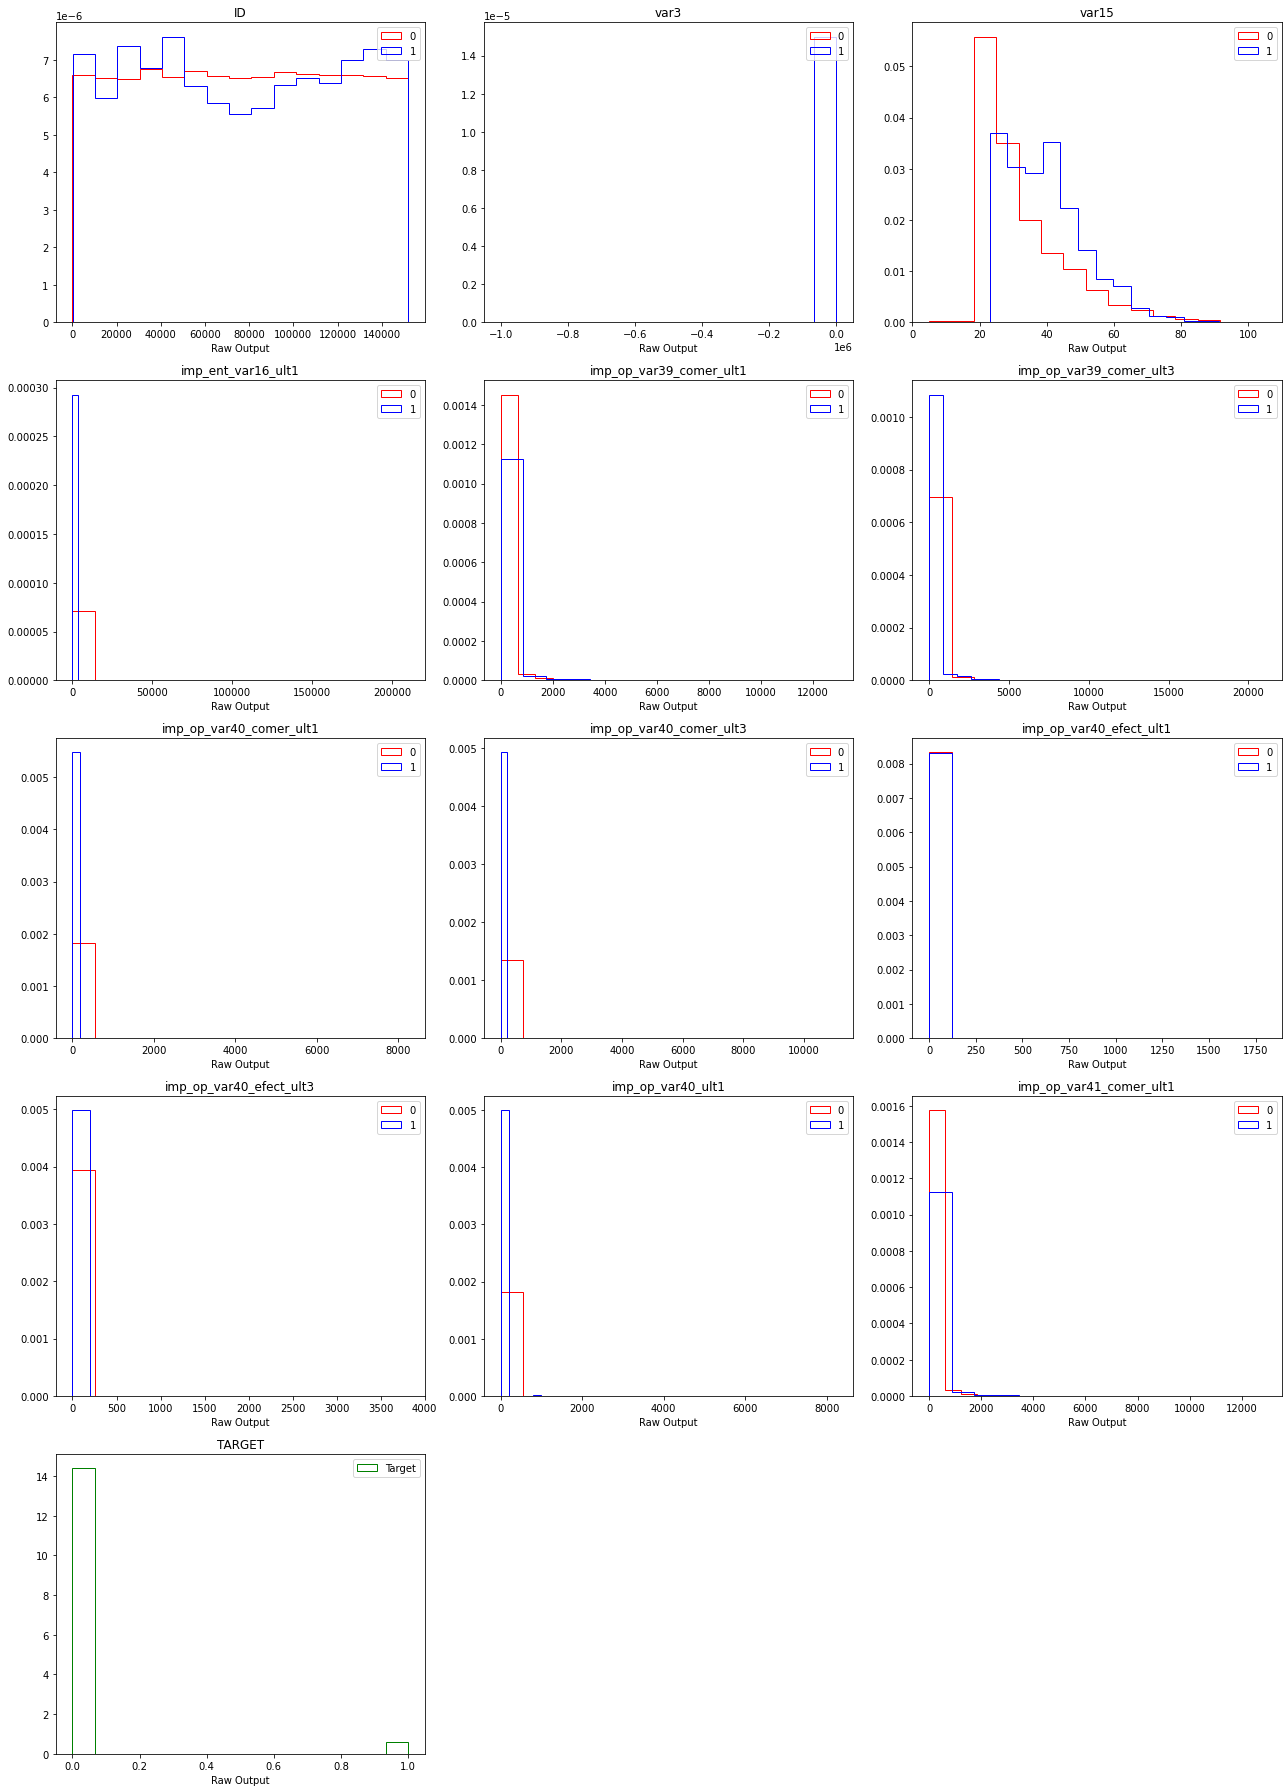

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def compare_features_binary(d, logscale=False):
    # Split the training data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(d["Training"], d["TARGET"], test_size=0.2, random_state=42)

    # Get the target variable
    target = y_train_split

    # Check if the target variable is an array of target values
    if isinstance(target, str):
        # Assuming target is the column name
        df_0 = X_train_split[y_train_split == 0]
        df_1 = X_train_split[y_train_split == 1]
    else:
        # Assuming target is an array of target values
        df_0 = X_train_split.loc[y_train_split == 0]
        df_1 = X_train_split.loc[y_train_split == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # Calculate the number of features
    num_features = min(12, X_train_split.shape[1])  # Considering only the first 12 features
    
    # Calculate the number of plots per row
    num_plots_per_row = min(3, num_features)  # Maximum of 3 plots per row

    # Calculate the number of rows needed
    num_rows = math.ceil((num_features + 1) / num_plots_per_row)  # Add one for the target column

    # Increase the size of individual plots
    plt.figure(figsize=(6 * num_plots_per_row, 5 * num_rows))

    # Plot histograms for raw outputs of each class
    for i, column in enumerate(X_train_split.columns[:num_features]):  # Looping through the first 12 columns
        plt.subplot(num_rows, num_plots_per_row, i + 1)
        plt.title(column)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=15, histtype="step", color="red", label="0", density=1, stacked=True)
        plt.hist(df_1[column], bins=15, histtype="step", color="blue", label="1", density=1, stacked=True)
        plt.legend()
        plt.xlabel("Raw Output")

    # Plot the target column
    plt.subplot(num_rows, num_plots_per_row, num_features + 1)
    plt.title("TARGET")
    plt.hist(y_train_split, bins=15, histtype="step", color="green", label="Target", density=1, stacked=True)
    plt.legend()
    plt.xlabel("Raw Output")

    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame and "TARGET" is the name of the target column
d = {"Training": df, "TARGET": df["TARGET"]}
compare_features_binary(d)


Cant make further inferences on the histogrmams due to their being no desscription of the labels on Kaggle, could have helped on machine learning model. decided to pivot and create balanced weights for the classes as an alternative to improve the model

In [25]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(class_weight = 'balanced')

In [26]:
# Train the classifier using the training data
clf.fit(X_train_split, y_train_split)

DecisionTreeClassifier(class_weight='balanced')

In [27]:
# Make predictions on the validation data
y_val_pred = clf.predict(X_val_split)

In [28]:
accuracy = accuracy_score(y_val_split, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9185082872928176


In [29]:
fpr, tpr, thresholds = roc_curve(y_val_split, y_val_pred)

In [30]:
roc_auc = roc_auc_score(y_val_split, y_val_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5636144345518403


In [31]:
test_data = pd.read_csv("test.csv")

In [32]:
# Make predictions on the test data
predictions_test = clf.predict(X_test)


submission = pd.DataFrame({'ID': test_data['ID'], 'TARGET': predictions_test})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)


code prepared for submision to Kaggle, will create " Sample Submission csv" file that can be uploaded to kaggle competition

In [33]:
import sklearn.discriminant_analysis as DA
Fisher = DA.LinearDiscriminantAnalysis()

In [34]:
Fisher.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
Fisher.predict(X_val_split.to_numpy())

/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


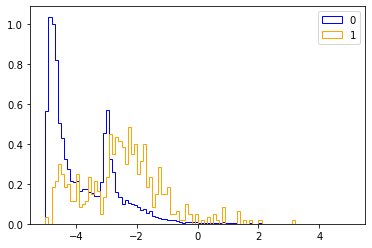

In [36]:
X_val_0 = X_val_split[y_val_split.to_numpy() == 0]  
X_val_1 = X_val_split[y_val_split.to_numpy() == 1]

plt.figure()

plt.hist(Fisher.decision_function(X_val_0.to_numpy()), bins=100, histtype="step", color="blue", label="0", stacked=True, density =1, range = (-5,5))

plt.hist(Fisher.decision_function(X_val_1.to_numpy()), bins=100, histtype="step", color="orange", label="1", stacked=True, density =1, range = (-5,5))

plt.legend(loc='upper right')

plt.show()


the x-values for each point represent the unlabeled variable that ranges from -2 to 4, while the y-values represent the level of satisfaction or dissatisfaction, with 0 being "satisfied" and higher values indicating a higher level of unsatisfaction.

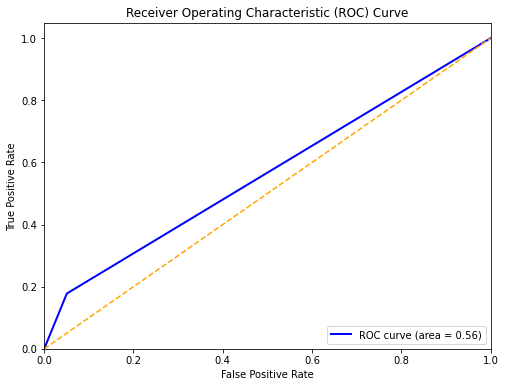

In [37]:
# Create ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve has an area of 0.56, which indicates that the classifier performs slightly better than random guessing (since an area of 0.5 would indicate random performance). The different points listed in the text likely represent different threshold settings and their corresponding TPR and FPR values.

In conclusion, The decision tree was the best machine learning algorithm used for categorical columns and can handle inbalanced data sets when combined with balancing the weights of the classes. Based on my kaggle score of 0.56265 i did not have the best result and could use further improvements. but with the limited information on the feautres descriptions i will have to find another angle on improving the model

# Deep Learning

In [38]:
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [39]:
import math

N_total = d["Training"].shape[0]
N_train = math.floor(.8*N_total)
N_val = math.floor((N_total-N_train)/2.)
N_test = math.floor((N_total-N_train)/2.)

X_Train = d["Training"][:N_train]
y_Train = d["TARGET"][:N_train]

X_val = d["Training"][N_train:N_val+N_train]
y_val = d["TARGET"][N_train:N_val+N_train]
                     
X_Test = d["Training"][N_train+N_val:N_test+N_val+N_train]
y_Test = d["TARGET"][N_train+N_val:N_test+N_val+N_train]

N_val

7602

In [56]:
#Building model
model = Sequential()
model.add(Dense(64, input_shape=(369,), activation='relu'))
model.add(Dense(12, input_dim=X_Train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Train model
history=model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9541 - loss: 12376.4834 - val_accuracy: 0.9566 - val_loss: 3067.7002
Epoch 2/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9626 - loss: 249.0960 - val_accuracy: 0.9565 - val_loss: 2336.8579
Epoch 3/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9623 - loss: 1539.6248 - val_accuracy: 0.9565 - val_loss: 4312.4663
Epoch 4/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9609 - loss: 271.5435 - val_accuracy: 0.9566 - val_loss: 3943.4309
Epoch 5/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9608 - loss: 788.4187 - val_accuracy: 0.9566 - val_loss: 2195.7690
Epoch 6/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9607 - loss: 876.4061 - val_accuracy: 0.9566 - val_loss: 1796.8706
Epoch 7/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9606 - loss: 767.6292 - val_accuracy: 0.9566 - val_loss: 0.1789
Epoch 8/10
6082/6082 ━━━━━━━━━━━━━━━━━━━━ 12s 2m

In [59]:
print (history.history)

{'accuracy': [0.9596158862113953, 0.9613752961158752, 0.961276650428772, 0.9613752961158752, 0.9613259434700012, 0.9613259434700012, 0.9613752961158752, 0.9613917469978333, 0.9613917469978333, 0.9613917469978333], 'loss': [4610.619140625, 649.1198120117188, 2886.097412109375, 1013.952392578125, 339.2156677246094, 1259.929443359375, 294.4967956542969, 0.2106042057275772, 0.1636776328086853, 0.1633896678686142], 'val_accuracy': [0.9565903544425964, 0.9564588069915771, 0.9565246105194092, 0.9565903544425964, 0.9565903544425964, 0.9565903544425964, 0.9565903544425964, 0.9565903544425964, 0.9565903544425964, 0.9565903544425964], 'val_loss': [3067.7001953125, 2336.85791015625, 4312.46630859375, 3943.430908203125, 2195.76904296875, 1796.87060546875, 0.1788986772298813, 0.17938239872455597, 0.17896176874637604, 0.17851167917251587]}


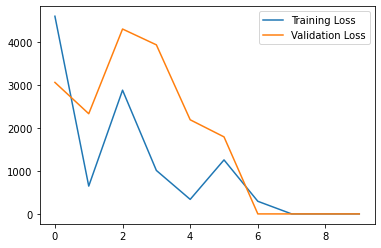

In [60]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

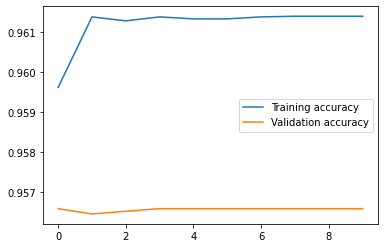

In [61]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

In [76]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model
scores = model.evaluate(X_Test, y_Test)
print(scores)


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5587 - loss: 39653.1016
[54696.1484375, 0.5534070134162903]


In [71]:
model.predict(X_Test)

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [72]:
X_Test_0 = X_Test[(y_Test==0).to_numpy()]
X_Test_1 = X_Test[(y_Test==1).to_numpy()]

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


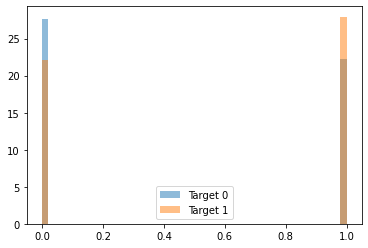

In [73]:
hist,bins,_= plt.hist(model.predict(X_Test_0),density=1,bins=50,alpha=0.5,label="Target 0")
hist,bins,_= plt.hist(model.predict(X_Test_1),density=1,bins=bins,alpha=0.5,label="Target 1")
plt.legend()

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step


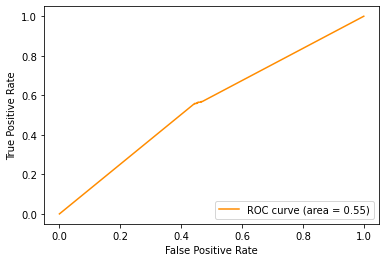

In [74]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Comparing the decison tree model to the Deep neural network model i can conclude that the decsion tree model preformed slighly better with a roc curve of 0.56